<a href="https://colab.research.google.com/github/5h33p/Income-Analysis-50K/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting DataFrame

In [ ]:
!pip install ucimlrepo

# Importing Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Separeting Data

In [ ]:
census_income = fetch_ucirepo(id=20)
X = census_income.data.features
y = census_income.data.targets

drop = ['workclass', 'occupation', 'native-country']

X = X.drop(columns=drop)

print(len(X), len(y))

48842 48842


# Treating Data

In [ ]:
obj_col = []

for column in X.columns:
  if X[column].dtype == 'object':
    X[column] = X[column].apply(lambda x: x.strip() if isinstance(x, str) else x)
    obj_col.append(column)

X = pd.get_dummies(X, columns=obj_col)

y = y.income.apply(lambda x: str(x).strip())
# print(y.income.unique()) # Labels has 4 entries: ['<=50K' '>50K' '<=50K.' '>50K.']
y = y.map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})

print(X.columns)
print(y.unique())

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'r

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=8)

# Creating Models

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=8)
rf.fit(x_train, y_train)

print(rf.score(x_test, y_test))

0.8392875422254069


In [ ]:
max_depth = [i for i in range(1, 26)]
accuracy_test = []
accuracy_train = []

for depth in max_depth:
  rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=8)
  rf.fit(x_train, y_train)
  accuracy_test.append(rf.score(x_test, y_test))
  accuracy_train.append(rf.score(x_train, y_train))
print(accuracy_test, accuracy_train)

[0.7549390930494421, 0.7904596171563107, 0.8251612242808886, 0.8371378851468932, 0.8433821271368614, 0.8462483365748797, 0.8478861705394616, 0.8515712969597707, 0.852492578564848, 0.8523902139420616, 0.8531067663015662, 0.8546422356433616, 0.8543351417750026, 0.8541304125294298, 0.8560753403623708, 0.8567918927218753, 0.8564847988535162, 0.8573037158358071, 0.8569966219674481, 0.8557682464940116, 0.8573037158358071, 0.8544375063977889, 0.8561777049851571, 0.8537209540382844, 0.8525949431876344] [0.762163130550508, 0.794717579914519, 0.8291915133212192, 0.8434212883576895, 0.8480536431807131, 0.8519182043866609, 0.8548102270109794, 0.8585468226140813, 0.8607478309830318, 0.8621554526143372, 0.8644588334655644, 0.8670437386430527, 0.8699613543879405, 0.8745425229698257, 0.8799170782893558, 0.8854195992117319, 0.8900519540347555, 0.8969365034678678, 0.9022598725462596, 0.9098610293553093, 0.9181787935402964, 0.9255752053847925, 0.9318455199242444, 0.9405471809177693, 0.9479179996416963]


In [ ]:
print(max(accuracy_test), accuracy_test.index(max(accuracy_test)))

0.8573037158358071 17


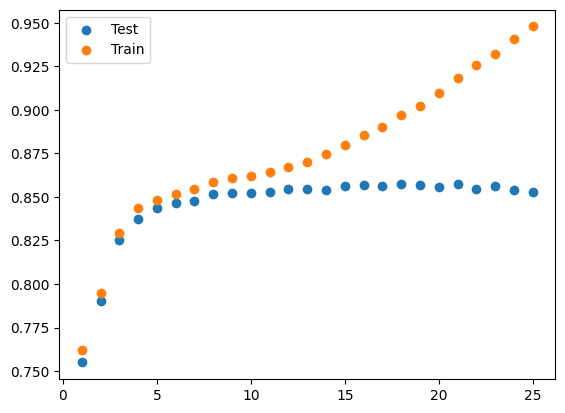

In [ ]:
depth = [i for i in range(1, 26)]

plt.scatter(depth, accuracy_test, label='Test')
plt.scatter(depth, accuracy_train, label='Train')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=17, random_state=8)
rf.fit(x_train, y_train)

important_features = pd.DataFrame(data={'feature': rf.feature_names_in_, 'importance': rf.feature_importances_})
print(important_features.sort_values(by='importance', ascending=False))

('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha', 'monotonic_cst')
                                 feature  importance
3                           capital-gain    0.176574
24     marital-status_Married-civ-spouse    0.125004
2                          education-num    0.118755
0                                    age    0.097644
29                  relationship_Husband    0.078383
5                         hours-per-week    0.072089
1                                 fnlwgt    0.069981
4                           capital-loss    0.052610
26          marital-status_Never-married    0.039674
15                   education_Bachelors    0.019105
18                     education_Masters    0.014480
34                     relationship_Wife    0.013706
30            relationship_Not-in-family    0.013181
40                            sex_Female    0.011737
32  

# Seperating New Data

In [ ]:
def educational_bin(row):
  if row in first_category:
    return 'high school or less'
  elif row in second_category:
    return 'college to bachelor'
  elif row in third_category:
    return 'master or higher'
  else:
    return row


census_income = fetch_ucirepo(id=20)
X = census_income.data.features
y = census_income.data.targets

drop = ['workclass', 'occupation', 'native-country']

X = X.drop(columns=drop)
obj_col = []

for column in X.columns:
  if X[column].dtype == 'object':
    X[column] = X[column].apply(lambda x: x.strip() if isinstance(x, str) else x)
    obj_col.append(column)

print(X.education.unique())
first_category = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Some-college', 'HS-grad']
second_category = ['Bachelors', 'Assoc-voc', 'Assoc-acdm']
third_category = ['Prof-school', 'Masters', 'Doctorate']

X['education_bin'] = X.education.apply(educational_bin)

obj_col.append('education_bin')
X = pd.get_dummies(X, columns=obj_col)

y = y.income.apply(lambda x: str(x).strip())
y = y.map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=8)

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   education_10th  education_11th  education_12th  education_1st-4th  ...  \
0           False           False           False              False  ...   
1           False           False           False              False  ...   
2           False           False           False              False  ...   
3           False            True           False         

# Testing 25 different depths

In [ ]:
max_depth = [i for i in range(1, 26)]
accuracy_test = []
accuracy_train = []

for depth in max_depth:
  rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=8)
  rf.fit(x_train, y_train)
  accuracy_test.append(rf.score(x_test, y_test))
  accuracy_train.append(rf.score(x_train, y_train))
print(accuracy_test, accuracy_train)

[0.7549390930494421, 0.7831917289384789, 0.8127751049237384, 0.8342716757088751, 0.8376497082608251, 0.8426655747773569, 0.8462483365748797, 0.8499334629951889, 0.852492578564848, 0.8525949431876344, 0.8532091309243526, 0.8540280479066434, 0.8545398710205753, 0.8556658818712253, 0.8557682464940116, 0.8579179035725253, 0.8564847988535162, 0.8565871634763026, 0.8555635172484389, 0.8540280479066434, 0.8548469648889344, 0.8553587880028662, 0.8522878493192753, 0.8526973078104207, 0.8497287337496161] [0.762163130550508, 0.789215058992143, 0.8205154454482635, 0.840017403321987, 0.8432165433931359, 0.8482839812658357, 0.8519949837483685, 0.8573951321884677, 0.8603639341744939, 0.8631791774371049, 0.8665574693522381, 0.8696542369411102, 0.8724950733242904, 0.8764876001330842, 0.8818877485731835, 0.888516366800604, 0.8927392316945205, 0.8999308985744632, 0.9068410411281448, 0.9153635502776853, 0.9212499680085993, 0.9293373941084636, 0.9354541499245003, 0.943464796662657, 0.9524735751030123]


In [ ]:
print(max(accuracy_test), accuracy_test.index(max(accuracy_test)))

0.8579179035725253 15


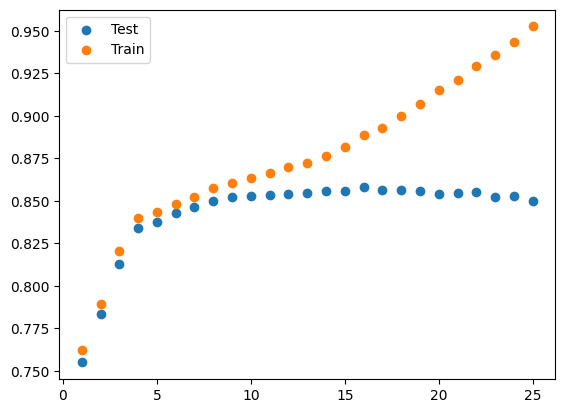

In [ ]:
plt.scatter(max_depth, accuracy_test, label='Test')
plt.scatter(max_depth, accuracy_train, label='Train')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=8)
rf.fit(x_train, y_train)

important_features = pd.DataFrame(data={'feature': rf.feature_names_in_, 'importance': rf.feature_importances_})
print(important_features.sort_values(by='importance', ascending=False))

                                 feature  importance
3                           capital-gain    0.163196
24     marital-status_Married-civ-spouse    0.133453
29                  relationship_Husband    0.086723
0                                    age    0.086707
2                          education-num    0.085918
5                         hours-per-week    0.066088
1                                 fnlwgt    0.053818
43     education_bin_high school or less    0.049627
4                           capital-loss    0.048208
26          marital-status_Never-married    0.043538
44        education_bin_master or higher    0.022872
34                     relationship_Wife    0.014402
30            relationship_Not-in-family    0.014271
32                relationship_Own-child    0.013095
15                   education_Bachelors    0.012036
41                              sex_Male    0.011060
42     education_bin_college to bachelor    0.009900
22               marital-status_Divorced    0.